# Training Deep Q-Learning Agents

In [3]:
import gymnasium as gym
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

from dqn import QAgent

In [4]:
# define environment
env = gym.make('LunarLander-v2', render_mode='rgb_array')

# set seed
seed = 31
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episodes = 100
batch_size = 64

# define and train agent
agent = QAgent(env)
returns, steps = agent.training(env, batch_size, episodes)

env.close()

episode: 1/100, return: -113, epsilon: 0.94, steps: 96
episode: 2/100, return: -256, epsilon: 0.73, steps: 124
episode: 3/100, return: -262, epsilon: 0.57, steps: 127
episode: 4/100, return: -320, epsilon: 0.48, steps: 83
episode: 5/100, return: -67, epsilon: 0.42, steps: 77
episode: 6/100, return: -34, epsilon: 0.34, steps: 97
episode: 7/100, return: -187, epsilon: 0.25, steps: 166
episode: 8/100, return: -33, epsilon: 0.17, steps: 180
episode: 9/100, return: 30, epsilon: 0.13, steps: 155
episode: 10/100, return: -212, epsilon: 0.09, steps: 169
episode: 11/100, return: -136, epsilon: 0.06, steps: 231
episode: 12/100, return: -195, epsilon: 0.02, steps: 506
episode: 13/100, return: -53, epsilon: 0.02, steps: 156
episode: 14/100, return: -114, epsilon: 0.01, steps: 69
episode: 15/100, return: -143, epsilon: 0.01, steps: 145
episode: 16/100, return: -64, epsilon: 0.01, steps: 656
episode: 17/100, return: -252, epsilon: 0.01, steps: 230
episode: 18/100, return: -18, epsilon: 0.01, steps: 

In [5]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 50 episodes: {np.mean(returns[-50:])}')

Average return: 60.33110499561364
Average return last 50 episodes: 224.6013855594776


/Users/riccardo/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

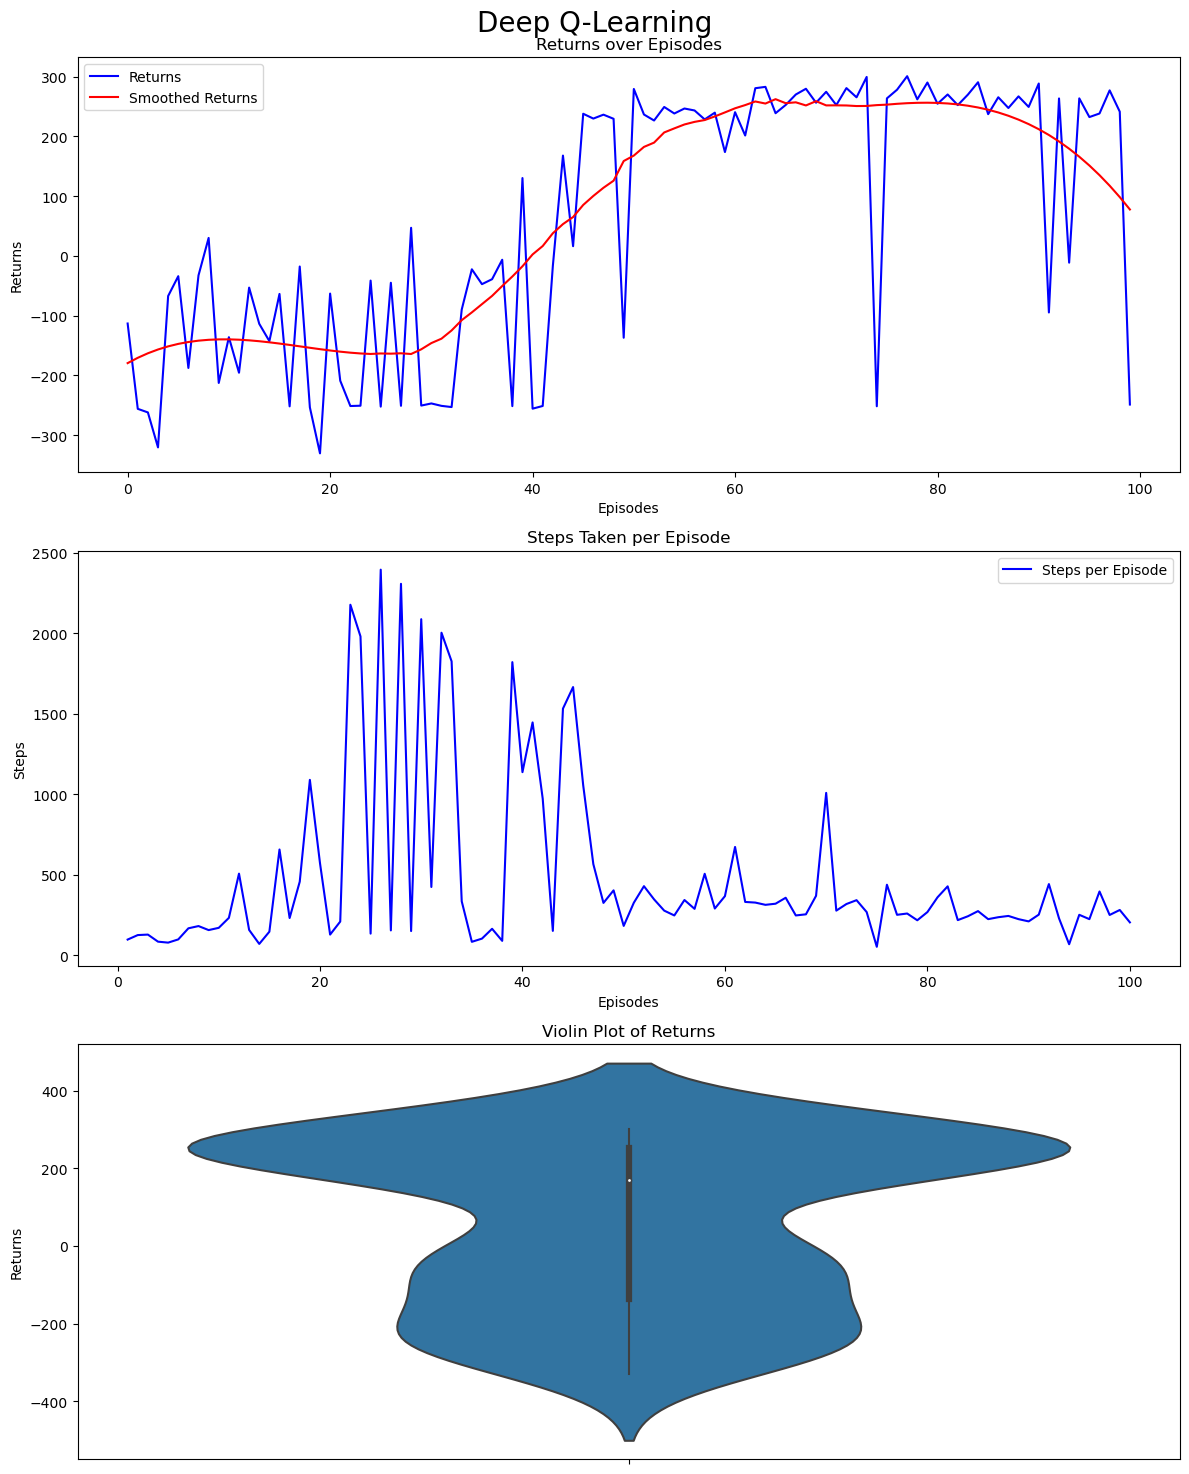

In [10]:
# Determine the window length based on the size of the data
window_length = min(50, len(returns))

# Apply Savitzky-Golay filter
smoothed_returns = savgol_filter(returns, window_length=window_length, polyorder=3)
# MA = pd.series(returns).rolling(window=100).mean()

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot returns and smoothed returns
sns.lineplot(data=returns, label='Returns', color='blue', ax=axs[0])
sns.lineplot(data=smoothed_returns, label='Smoothed Returns', color='red', ax=axs[0])
# sns.lineplot(data=MA, label='Smoothed Returns', color='red', ax=axs[0])
axs[0].set_ylabel('Returns')
axs[0].set_xlabel('Episodes')
axs[0].set_title('Returns over Episodes')
axs[0].legend()

# Plot steps taken per episode
sns.lineplot(x=steps.keys(), y=steps.values(), label='Steps per Episode', color='blue', ax=axs[1])
axs[1].set_ylabel('Steps')
axs[1].set_xlabel('Episodes')
axs[1].set_title('Steps Taken per Episode')
axs[1].legend()

# Plot violin plot of returns
sns.violinplot(y=returns, ax=axs[2])
axs[2].set_ylabel('Returns')
axs[2].set_title('Violin Plot of Returns')

plt.suptitle('Deep Q-Learning', fontsize=20)
plt.tight_layout()
plt.show()
